In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn")
sns.set(font_scale=2.5)

import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\younho\AppData\Local\Temp\ipykernel_35848\3455359789.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# 데이터 로딩
-----------

*   데이터가 어떻게 생겼는지 확인합니다.   
*   데이터는 train, test, artist가 존재합니다.   
*   train 과 test의 경우 그림의 경로를 알려주고 artist의 경우 화가의 정보를 알려줍니다



In [3]:
# Train csv 파일 읽기 (5911 x 3)
# 3개의 column은 ID, img_path, label인 artist로 구성되어 있다.
df_train = pd.read_csv("art/train.csv")
df_train.head()

,id,img_path,artist
0,0,./train/0000.jpg,Diego Velazquez
1,1,./train/0001.jpg,Vincent van Gogh
2,2,./train/0002.jpg,Claude Monet
3,3,./train/0003.jpg,Edgar Degas
4,4,./train/0004.jpg,Hieronymus Bosch


In [11]:
# Test에서는 데이터에 대한 label 정보는 없고 img_path만 존재.
df_test = pd.read_csv("art/test.csv")
df_test.head()


,id,img_path
0,TEST_00000,./test/TEST_00000.jpg
1,TEST_00001,./test/TEST_00001.jpg
2,TEST_00002,./test/TEST_00002.jpg
3,TEST_00003,./test/TEST_00003.jpg
4,TEST_00004,./test/TEST_00004.jpg


In [12]:
# 본 대회에서는 artist에 대한 정보를 준다.
# train에서 label로 사용될 아티스트의 이름, 생년, 아티스트의 장르, 국적이 있다.
# 년도와 국적은 그렇게 쓸모 있는 정보는 아니지만 장르는 쓸모 있을수도 있다.

df_artist = pd.read_csv("art/artists_info.csv")
df_artist.head()

,name,years,genre,nationality
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican
3,Claude Monet,1840 - 1926,Impressionism,French
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian


# 데이터 검증
-----------
*   데이터에 결측치가 있는지 확인합니다
*   train, artist의 정보가 서로 일치하는지 확인합니다.

<AxesSubplot: >

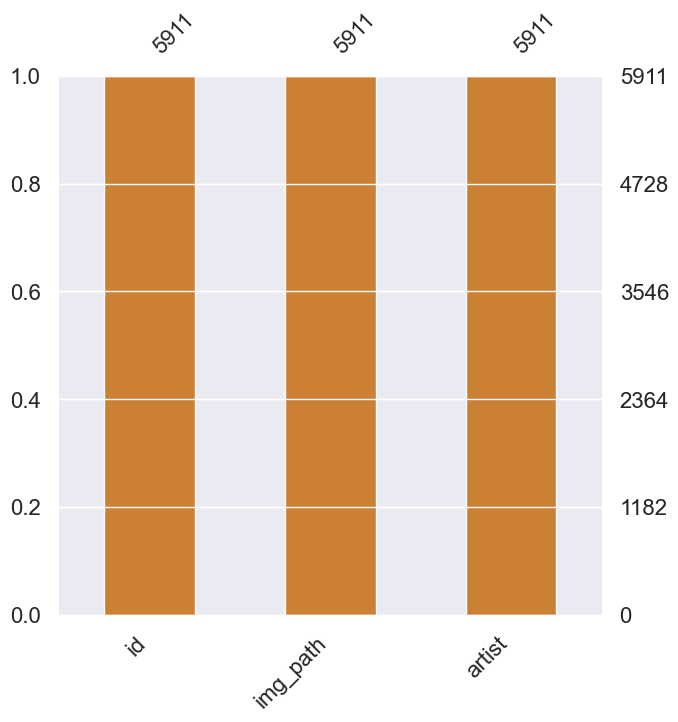

In [13]:
# 결측치가 있는지 확인한다.
# 완벽한 데이터이다.
msno.bar(df=df_train.iloc[:, :], figsize=(7,7), color=(0.8, 0.5, 0.2))

In [96]:
# Durer이 독일어로 써져있어서 문제가 생겼다 
# index 는 19이다
artist_train = set(df_train["artist"])
for idx, a in enumerate(df_artist['name']):
    if a not in artist_train:
        print(a, idx)

Albrecht Dürer 19


In [99]:
for a in artist_train:
    if "Albrecht" in a:
        print(a)
df_artist['name'][19] = "Albrecht Du rer"


Albrecht Du rer


# EDA
--------------
*   Train과 Test를 먼저 확인하면서 Train환경과 Test의 환경이 서로 비슷한지 봅니다.
*   이미지 크기를 가지고 판단합니다


In [29]:
# 생각해야할 feature는 작가, 장르, 이미지 크기가 있다
# 우선 train과 test data의 특징이 뭐가 있는지 본다.
# 이미지 크기를 dataframe에 추가한다.
import os
import cv2
img_size = []
x = []
y = []
for d in df_train['img_path']:
    data = cv2.imread(os.path.join("art", d))
    h, w, c = data.shape
    y.append(h)
    x.append(w)
    img_size.append(h * w)
df_train['img_size'] = img_size
df_train['width'] = x
df_train['height'] = y


In [34]:
img_size = []
x = []
y = []
for d in df_test['img_path']:
    data = cv2.imread(os.path.join("art", d))
    h, w, c = data.shape
    y.append(h)
    x.append(w)
    img_size.append(h * w)
df_test['img_size'] = img_size
df_test['width'] = x
df_test['height'] = y


count    5.911000e+03
mean     9.444241e+05
std      8.119757e+05
min      5.559300e+04
25%      4.859070e+05
50%      7.792640e+05
75%      9.957600e+05
max      1.138618e+07
Name: img_size, dtype: float64

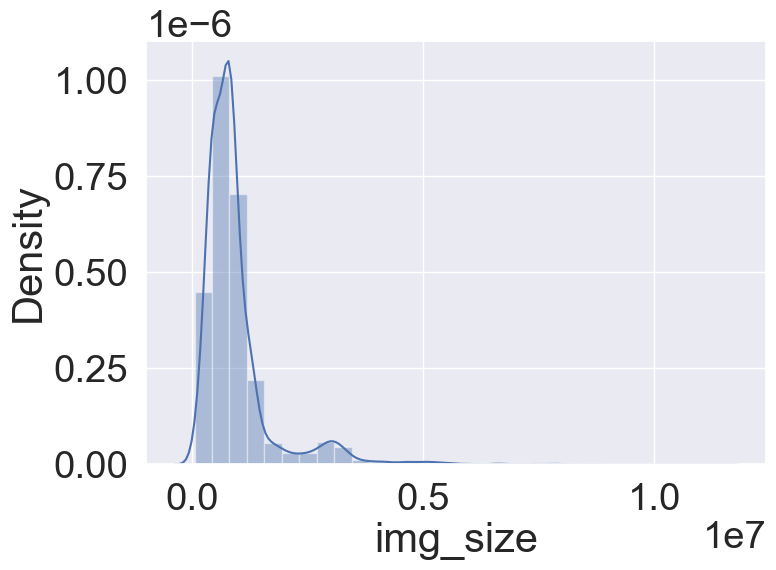

In [35]:
# 평균적으로 944424.1 사이즈를 가지고 있다.
# 중간값은 779264 사이즈
sns.distplot(a = df_train['img_size'], bins=30)
df_train['img_size'].describe()

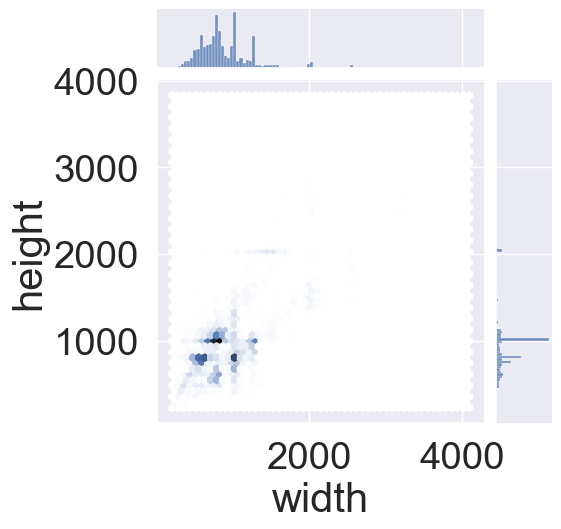

In [33]:
# x,y 의 jointplot을 통해서 직사각형, 정사각형 형태인지 확인한다.
# width, height 가 1000이하인 데이터가 많은 편이고 직사각형이 많다 (정사각형은 거의 없는것으로 보임)
sns.jointplot(x='width', y='height', data=df_train, kind='hex')

count    1.267000e+04
mean     2.466596e+05
std      2.180696e+05
min      1.560000e+04
25%      1.259180e+05
50%      1.968675e+05
75%      2.595840e+05
max      2.720000e+06
Name: img_size, dtype: float64

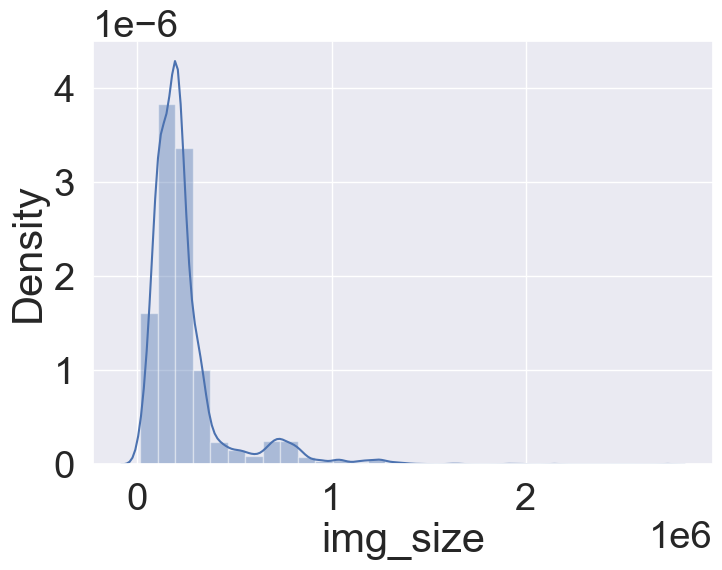

In [36]:
# 평균적으로 246659 사이즈를 가지고 있다.
# 중간값은 196867 
# 4배가 작다.
# 확실히 test가 Train에 비해서 작은 경향을 보이고 있다.
# 하지만 분포는 거의 동일하므로 어찌 보면 width, height가 반으로 줄인것 같다.
sns.distplot(a = df_test['img_size'], bins=30)
df_test['img_size'].describe()

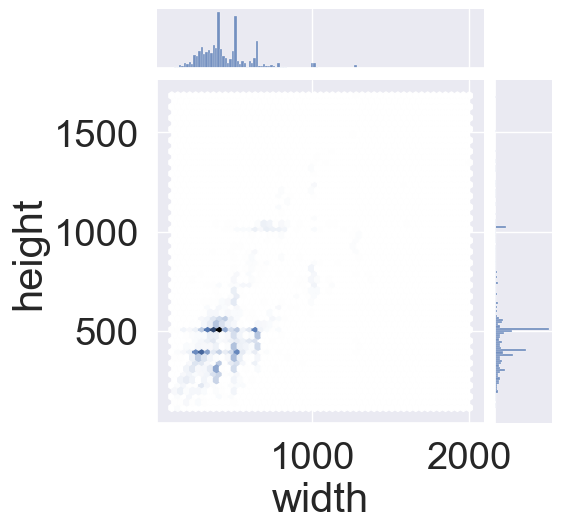

In [37]:
# 역시나 train에서는 1000에 몰려있는 점이있지만 여기선 500에 몰려있다.
# 즉 width, height를 반으로 줄인 이미지라고 볼 수 있다.
# train할 때 반으로 줄여서 training 시키는 것도 좋은 방법이라 생각된다.
# train과 같이 정사각형의 data가 별로 없다.
sns.jointplot(x='width', y='height', data=df_test, kind='hex')

In [100]:
# plot을 용이하게 하기 위하여 artist의 정보와 train_label의 정보를 합친다.
df_merge = pd.merge(df_train, df_artist, how='left', left_on='artist', right_on='name')
df_merge.pop("name")
df_merge.head()

,id,img_path,artist,img_size,width,height,years,genre,nationality
0,0,./train/0000.jpg,Diego Velazquez,1331200,1024,1300,1599 - 1660,Baroque,Spanish
1,1,./train/0001.jpg,Vincent van Gogh,581632,568,1024,1853 – 1890,Post-Impressionism,Dutch
2,2,./train/0002.jpg,Claude Monet,739328,1024,722,1840 - 1926,Impressionism,French
3,3,./train/0003.jpg,Edgar Degas,880308,1053,836,1834 - 1917,Impressionism,French
4,4,./train/0004.jpg,Hieronymus Bosch,660790,782,845,1450 - 1516,Northern Renaissance,Dutch


<AxesSubplot: >

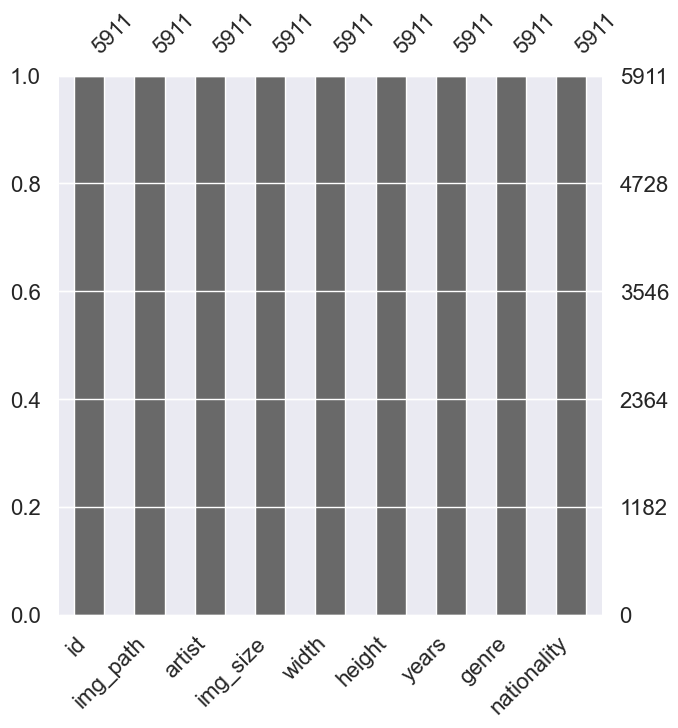

In [102]:
msno.bar(df_merge, figsize=(7,7))

count     50.000000
mean     118.220000
std      110.902842
min       21.000000
25%       59.250000
50%       82.500000
75%      135.750000
max      629.000000
Name: artist, dtype: float64

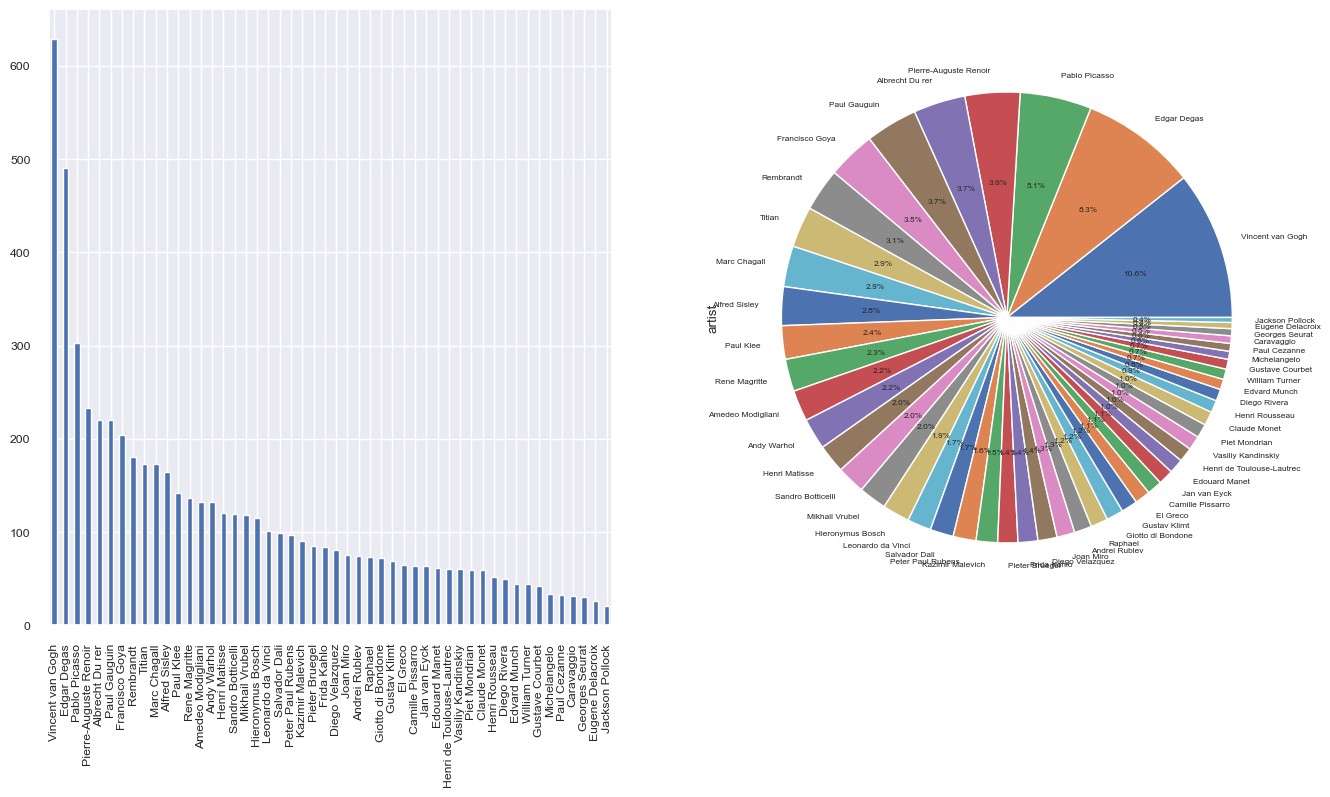

In [103]:
# train에 어떤 작가의 작품이 얼마만큼 준비되어있는지 본다
# 빈센트 반 고흐가 가장 높은 숫자를 기록하고 있다.
# 가장 적은 작품수는 21, 가장 많은 작품수는 629개이다.
# data imbalance가 어느정도 있다는 점을 확인할 수 있다.
f, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.set(font_scale=0.8)
_ = plt.xticks(rotation='vertical')
df_merge['artist'].value_counts().plot.bar(ax=ax[0])
df_merge['artist'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1], textprops={'fontsize': 6})
df_train['artist'].value_counts().describe()

<AxesSubplot: ylabel='genre'>

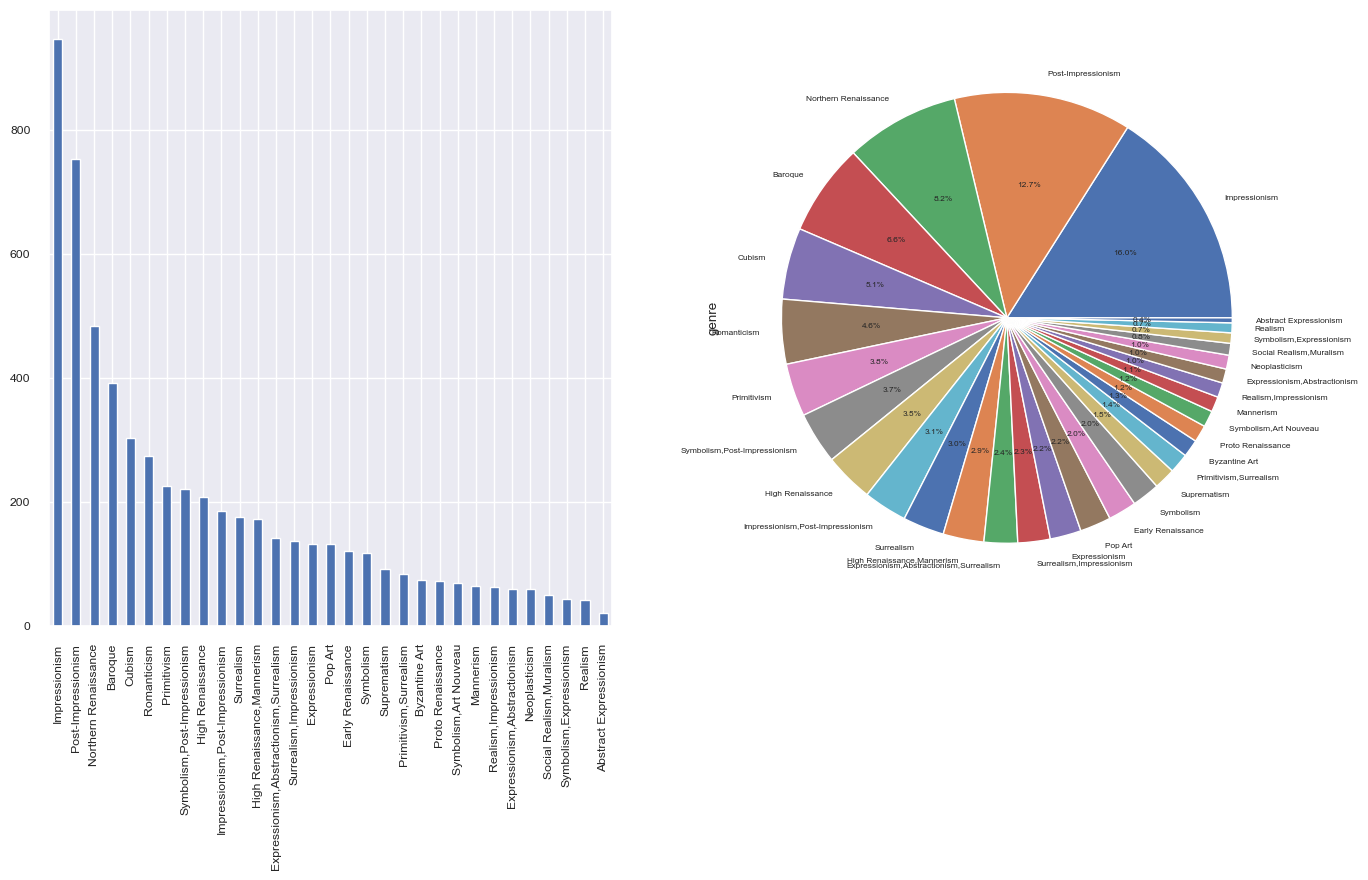

In [104]:
# 인상주의, 포스트 인상주의가 가장 많은것으로 보이고 있다. (16% + 12.7%)
f, ax = plt.subplots(1, 2, figsize=(16,8))
sns.set(font_scale=0.8)
_ = plt.xticks(rotation='vertical')
df_merge['genre'].value_counts().plot.bar(ax = ax[0])
df_merge['genre'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1], textprops={'fontsize': 6})


In [123]:
# 평균내기 생애 중반을 전성기로 판단함
for i in range(len(df_merge['years'])):
    try:
        df_merge['years'][i] = int(np.array(list(map(int,[df_merge['years'][i].split(' ')[0], df_merge['years'][i].split(' ')[-1]]))).mean())
    except:
        pass

0    1629
1    1871
2    1883
3    1875
4    1483
5    1880
6    1932
7    1932
8    1519
9    1608
Name: years, dtype: object

In [136]:
import math
centry = []
for tmp in df_merge['years']:
    tmp = math.ceil(tmp / 100)
    centry.append(tmp)
df_merge['centry'] = centry


<AxesSubplot: xlabel='centry', ylabel='count'>

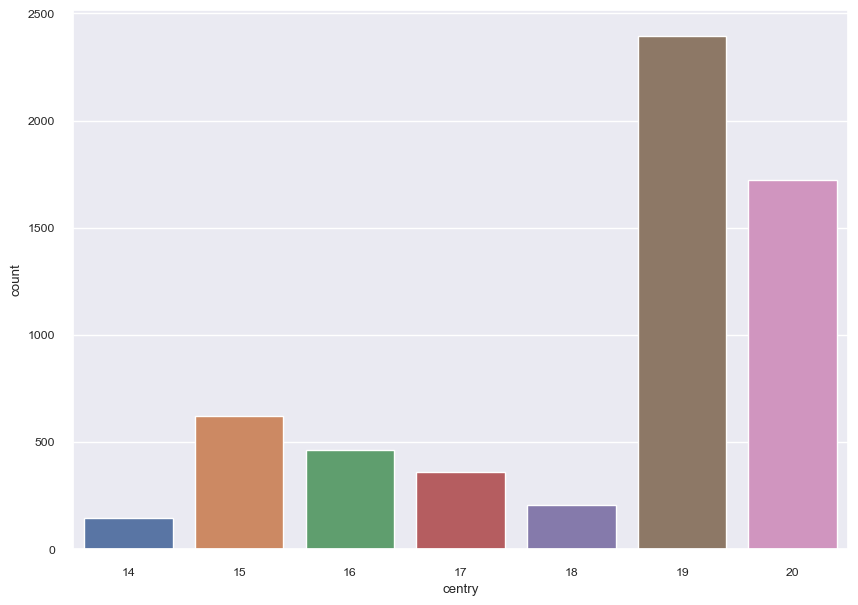

In [145]:
# 점점 더 현대로 오면 올수록 작품수가 많아지는 경향을 보임.
plt.figure(figsize=(10,7))
sns.countplot(df_merge, x='centry')